# How to Fit Reflectivity Data In Python

## Simulating some Scattering


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pyref.fitting as fit

# Building the Slab Structure

pyref constructs a model based on the optical constants defined in each layer of a
multilayer structure. To do this, we need to define the layers and their properties.
Material SLDs (Scattering Length Densities) are used to define the optical properties
a layer based on the composition and density of the material, using the constants you
can find in a database like the NIST X-ray and neutron scattering database.

## Layer Structure Diagram

<div style="width: 20%; height: 350px; position: relative; border: 2px solid #333; display: flex; flex-direction: column; align-items: left; justify-content: left; border-radius: 10px; margin: 0 auto; border-color: transparent;">

  <!-- Container for centered slabs -->
  <div style="position: relative; width: 300px; height: 320px;">
  
  <!-- Vacuum Layer -->
  <div style="position: absolute; top: 20px; left: 50px; width: 200px; height: 60px; background: linear-gradient(135deg, #cce7ff, #e6f3ff); border: 2px solid #007bff; border-radius: 8px; border-top: 2px solid transparent; display: flex; align-items: center; justify-content: center; font-weight: bold; color: #0056b3; box-shadow: 0 3px 10px rgba(0,123,255,0.2); font-size: 14px;">
  Vacuum
  </div>
  
  <!-- Bulk Layer -->
  <div style="position: absolute; top: 80px; left: 50px; width: 200px; height: 150px; background: linear-gradient(135deg, #ffe4cc, #fff2e6); border: 2px solid #fd7e14; border-radius: 8px; display: flex; align-items: center; justify-content: center; font-weight: bold; color: #c65d00; box-shadow: 0 3px 10px rgba(253,126,20,0.2); font-size: 14px;">
  Bulk Material
  </div>
  
  <!-- SiO2 Layer -->
  <div style="position: absolute; top: 230px; left: 50px; width: 200px; height: 20px; background: linear-gradient(135deg, #d1f2d8, #e8f5e8); border: 2px solid #28a745; border-radius: 8px; display: flex; align-items: center; justify-content: center; font-weight: bold; color: #1e7e34; box-shadow: 0 3px 10px rgba(40,167,69,0.2); font-size: 14px;">
  SiO₂
  </div>
  
  <!-- Silicon Substrate -->
  <div style="position: absolute; top: 250px; left: 50px; width: 200px; height: 60px; background: linear-gradient(135deg, #e2e6ea, #f1f3f4); border: 2px solid #6c757d; border-radius: 8px; border-bottom: 2px solid transparent; display: flex; align-items: center; justify-content: center; font-weight: bold; color: #495057; box-shadow: 0 3px 10px rgba(108,117,125,0.2); font-size: 14px;">
  Silicon Substrate
  </div>
  
  <!-- Title -->
  <div style="position: absolute; top: 1px; font-size: 16px; align-items: center; justify-content: center font-weight: bold; color: #333; background: rgba(255,255,255,0.9); padding: 5px 15px; border-radius: 20px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
  Multilayer Structure
  </div>
</div>
</div>

This four-layer structure represents a typical sample for X-ray or neutron reflectometry measurements, where each interface contributes to the overall reflectivity profile.


<Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>

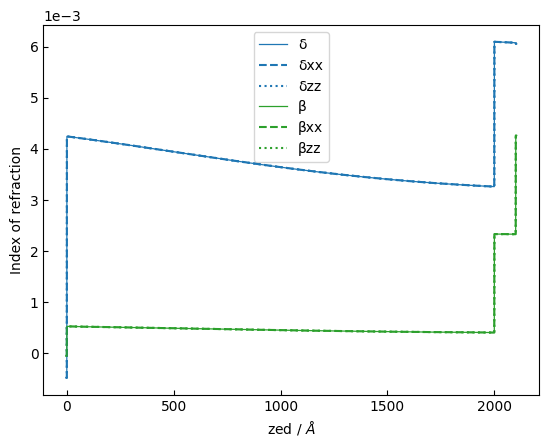

In [76]:
energy = 250  # Energy in eV
oocs = np.array(
    [
        1.0 + 0.0j,  # vac
        0.99526942 + 0.00058065j,  #
        0.99684628 + 0.0003871j,  #
        0.99400837 + 0.00231663j,
        0.99402847 + 0.0042505j,
    ]
)
oocs = 1 - oocs  # Convert to SLDs
oocs.imag *= -1
roughs = np.array([0.0, 10.0, 0.0, 0.0]) * 1e2
thicks = np.array([5.0, 15.0, 1.0]) * 1e2

vac = fit.SLD(oocs[0])(thick=0, rough=0)  # Vacuum layer, no thickness or roughness
layer1 = fit.SLD(oocs[1])(thick=thicks[0], rough=roughs[0])
layer2 = fit.SLD(oocs[2])(thick=thicks[1], rough=roughs[1])
layer3 = fit.SLD(oocs[3])(thick=thicks[2], rough=roughs[2])
layer4 = fit.SLD(oocs[4])(thick=0, rough=0)  #

slab = vac | layer1 | layer2 | layer3 | layer4
slab.name = "Single layer Zinc Phthalocyanine on Silicon Substrate"
slab.plot()

In [23]:
complex(layer4.sld), oocs[4]

((0.005971529999999947+0.004250499999999999j),
 np.complex128(0.005971529999999947+0.0042505j))

<Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>

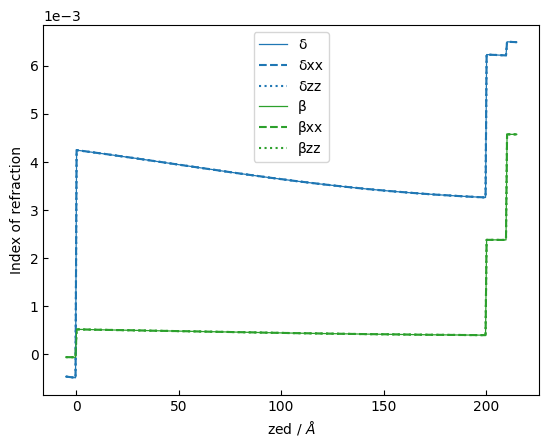

In [73]:
energy = 250  # Energy in eV
oocs = np.array(
    [
        1.0 + 0.0j,  # vac
        0.99526942 + 0.00058065j,  #
        0.99684628 + 0.0003871j,  #
        0.99400837 + 0.00231663j,
        0.99402847 + 0.0042505j,
    ]
)
oocs = 1 - oocs  # Convert to SLDs
oocs.imag *= -1
roughs = np.array([0, 100, 0.0])
thicks = np.array([50, 150, 10])
vac = fit.MaterialSLD("", density=1, energy=energy)(
    thick=0, rough=0
)  # Vacuum layer, no thickness or roughness
layer1 = fit.MaterialSLD("C32H16N8Zn1", energy=energy, density=1.6 * 1.5)(
    thick=thicks[0], rough=roughs[0]
)
layer2 = fit.MaterialSLD("C32H16N8Zn1", energy=energy, density=1.6)(
    thick=thicks[1], rough=roughs[1]
)
layer3 = fit.MaterialSLD("SiO2", energy=energy, density=2.33)(
    thick=thicks[2], rough=roughs[2]
)
layer4 = fit.MaterialSLD("Si", energy=energy, density=2.5)(
    thick=0, rough=0
)  # Another vacuum layer

slab = vac | layer1 | layer2 | layer3 | layer4
slab.name = "Single layer Zinc Phthalocyanine on Silicon Substrate"
slab.plot()

### Modeling XRR From the structure

Reflectivity measures the interference pattern caused by reflections from stratified
interfaces. So to model a reflectivity experiment, we need to model that. This is done
using the 4x4 transfer matrix method that solves Maxwell's equations for simple
1D structures like this one.


(1e-09, 2)

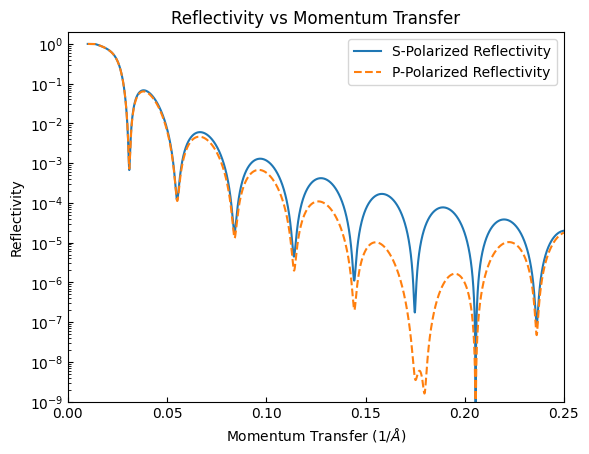

In [74]:
# set the ticks to point inwards
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

# For the fitting, we need to define a model.

s_pol_function = fit.ReflectModel(
    structure=slab,  # The slab we just created
    energy=energy,  # Energy in eV
    pol="s",  # S-polarized light
    name="Zinc Phthalocyanine Reflectivity Model",  # Name of the model
)
p_pol_function = fit.ReflectModel(
    structure=slab,  # The slab we just created
    pol="p",  # P-polarized light
    energy=energy,  # Energy in eV
    name="Zinc Phthalocyanine Reflectivity Model",  # Name of the model
)
q = np.linspace(0.01, 0.25, 10000)
s_pol_reflectivity = s_pol_function(q)  # S-polarized reflectivity
p_pol_reflectivity = p_pol_function(q)  # P-polarized reflectivity

# Now we can plot the reflectivity for both polarizations.
fig, ax = plt.subplots()
ax.plot(q, s_pol_reflectivity, label="S-Polarized Reflectivity")
ax.plot(q, p_pol_reflectivity, label="P-Polarized Reflectivity", linestyle="--")
ax.set_xlabel(r"Momentum Transfer $(1/\AA)$")
ax.set_ylabel("Reflectivity")
ax.set_title("Reflectivity vs Momentum Transfer")
ax.set_yscale("log")  # Reflectivity is often plotted on a logarithmic scale
ax.legend()
# just some aesthetic adjustments
ax.set_xlim(0, 0.25)  # Set x-axis limits
ax.set_ylim(1e-9, 2)

In [75]:
np.max(s_pol_reflectivity), np.max(p_pol_reflectivity)

(np.float64(1.0), np.float64(1.0))

The plot above gives the expected specular reflectivity of our input structure

# Fitting Data

Now that we have a model, we want to use it to fit some data. To do this, we need to
load in the data and build an Objective function that we can minimize. To do this we need
to read in the data stored in the `june_processed.parquet` file. I like to use polars
to read the data due to it's expressive queries, but plotting is better in pandas.


In [79]:
import polars as pl

df = (
    (
        pl.read_parquet("june_processed.parquet")
        .sort(pl.col("Q"))
        .sort(pl.col("pol"), descending=True)
    )
    .filter(
        (
            pl.col("sample").str.starts_with("mono")
            & pl.col("Beamline Energy [eV]").eq(energy)
        )
    )
    .to_pandas()
)
df.head()

Beamline Energy [eV]     sample pol    bt         Q         r
0                 250.0  monolayer   s  june  0.006119  0.936206
1                 250.0  monolayer   s  june  0.007145  0.910740
2                 250.0  monolayer   s  june  0.008161  0.899292
3                 250.0  monolayer   s  june  0.009178  0.859969
4                 250.0  monolayer   s  june  0.010203  0.835963

While it is nice to store things in a dataframe, we will need to cast it into a new form
for fitting. There is a converter in the pyref toolbox we can use


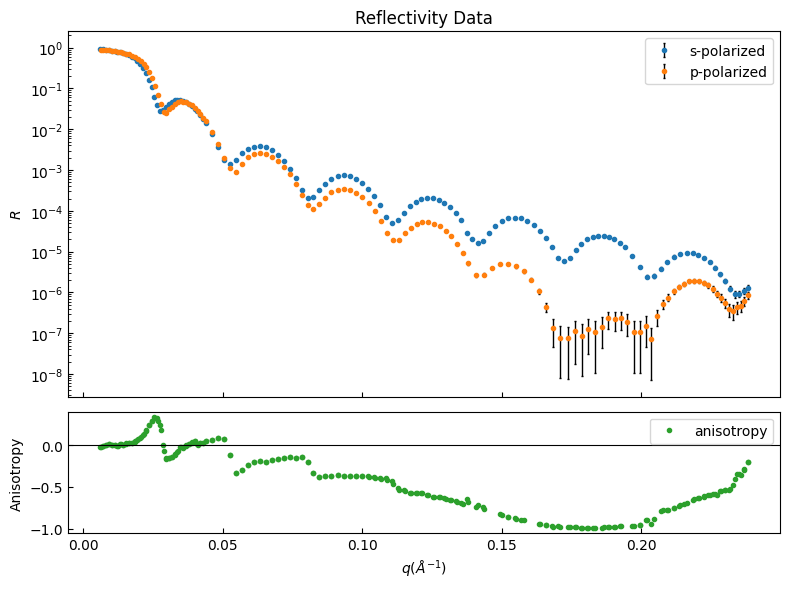

In [80]:
data = fit.to_reflect_dataset(
    df,
)
ax_top, ax_bottom = data.plot()
ax_top.set_title("Reflectivity Data")
ax_bottom.set_ylabel("Anisotropy")

# Just some aesthetic adjustments
fig = plt.gcf()
ax_top.legend(["s-polarized", "p-polarized"])
fig.set_size_inches(8, 6)
fig.align_labels()
plt.tight_layout()
plt.show()

What is plotted above is the reflectivity data collected from the Synchrotron at LBNL.
In the top pannel we have the x and p polarized data plotted vs q, and in the bottom
graph we show the normalized difference between the two s and p polarized datasets. We
call this difference the `Anisotropic Ratio`

$$
    Ani = \frac{R_p - R_s}{R_p + R_s}
$$

Where $R_p$ and $R_s$ are the p and s polarized reflectivity values.

## Building the Objective function

We now want to build something called the objective function. This is the function what
we want to minimize. We can skip over allot of thNumber of parameters: 20
Varying parameters: 12e math here, but at it's most basic,
this function can be defined simply by the following.

$$
    f(\theta) = \sum_i\frac{data_i - model(\theta)_i}{err_i}
$$

Using pyref, we can build this objective function and get started fitting.


(<Axes: ylabel='Reflectivity'>,
 <Axes: xlabel='$q (\\AA^{-1})$', ylabel='Anisotropy'>)

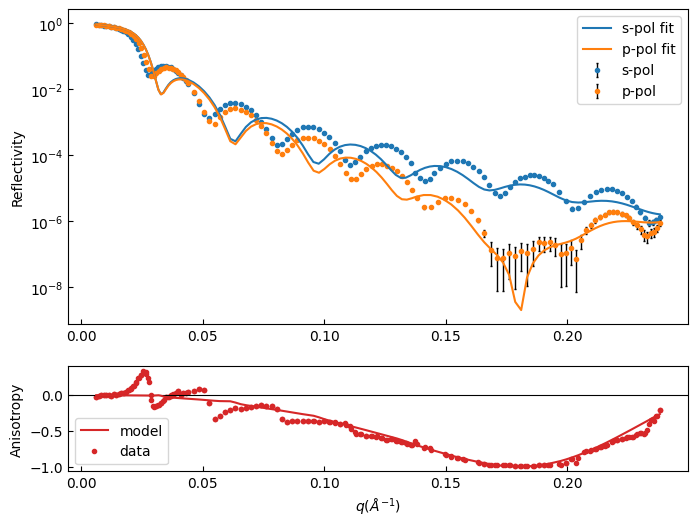

In [81]:
model = fit.ReflectModel(
    structure=slab,  # The slab we just created
    energy=energy,  # Energy in eV
    pol="sp",  # S and P-polarized light
    name="Zinc Phthalocyanine Reflectivity Model",  # Name of the model
)

obj = fit.AnisotropyObjective(
    data=data,  # The data we just created
    model=model,  # The model we just created
    name="Zinc Phthalocyanine Reflectivity Objective",  # Name of the objective
    transform=fit.Transform("logY"),
)
# we also want to apply this little modification to the logp of the system.
lpe = fit.LogpExtra(obj)
obj.logp_extra = lpe
# This ensures that the roughness and thickness parameters are physical.
obj.plot()

## Investigating Parameters

Now we want to ensure we are fitting the correct parameters to the system, and ensure
everything is being varried successfully. To do this we can look at all the possible
parameters that are used to define this system.


In [105]:
from refnx.analysis import Parameters
import sigfig


def all_parameters(parameter_group):
    if isinstance(parameter_group, Parameters):
        params = []
        for param in parameter_group:
            params.extend(all_parameters(param))
        return params
    else:
        return [parameter_group]


def print_parameters(obj):
    """Print all parameters in the object."""
    param_list = all_parameters(obj.parameters)
    print(f"Number of parameters: {len(param_list)}")
    print(f"Varying parameters: {len(obj.varying_parameters())}")
    print("-" * 82)
    for param in param_list:
        vary_status = "✓" if param.vary else "✗"
        color = (
            "\033[94m" if param.vary else "\033[91m"
        )  # Light blue for vary=True, red for vary=False
        reset_color = "\033[0m"  # Reset to default color
        if param.stderr and param.stderr != 0:
            stderr = sigfig.round(param.stderr, sigfigs=1)
            val = round(param.value, -int(np.floor(np.log10(param.stderr))))
            val_str = f"{val:10.3f}"
            stderr_str = f"{stderr:g}"  # Remove trailing zeros
        else:
            stderr_str = "0"
            val_str = (
                f"{param.value:10.3f}"
                if param.name != "bkg"
                else f"{param.value:10.3g}"
            )

        print(
            f"|{color}{vary_status} | {param.name:30} | {val_str} ± {stderr_str:>8} | {str(param.bounds):18}{reset_color} |"
        )
    print("-" * 82)


print_parameters(obj)

Number of parameters: 20
Varying parameters: 7
----------------------------------------------------------------------------------
|✓ | scale_s                        |      1.000 ±        0 | [0.8, 1.2]         |
|✓ | scale_p                        |      1.000 ±        0 | [0.8, 1.2]         |
|✗ | bkg                            |   7.14e-08 ±        0 | [-inf, inf]        |
|✗ | dq - resolution                |      0.000 ±        0 | [-inf, inf]        |
|✗ | q_offset                       |      0.000 ±        0 | [-inf, inf]        |
|✗ | en_offset                      |      0.000 ±        0 | [-inf, inf]        |
|✓ | theta_offset_s                 |      0.000 ±        0 | [-0.8, 0.8]        |
|✓ | theta_offset_p                 |      0.000 ±        0 | [-0.8, 0.8]        |
|✗ | Vacuum_thick                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rough                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rho                     |   

There are 20 total parameters defining out model, 12 of those parameters are allowed to
vary durreing the optimization process. However, we want to change some of this arround.

**Parameters to hold constant**

- Vacuum thickness should be constant and set to 0
- Vacuum density (rho) should be constant and set to 0
- Silicone Substrate thickness should be constant and set to 0
- Silicone Substrate (rho) should be constant and set to 2.20
- Ozide thickness and roughness should be held constant.

To fix this, we can use the `parameter.setp(...)` idiom.


In [84]:
# Hold constant the parameters that we want to fix during the fit
vacuum.thick.setp(vary=False)
vacuum.rough.setp(vary=False)
vacuum.sld.density.setp(vary=False)
oxide.thick.setp(vary=False)
oxide.rough.setp(vary=False)
oxide.sld.density.setp(vary=False)
substrate.thick.setp(vary=False)
substrate.rough.setp(vary=False)
substrate.sld.density.setp(vary=False)
print_parameters(obj)

Number of parameters: 20
Varying parameters: 3
----------------------------------------------------------------------------------
|✗ | scale_s                        |      1.000 ±        0 | [-inf, inf]        |
|✗ | scale_p                        |      1.000 ±        0 | [-inf, inf]        |
|✗ | bkg                            |      0.000 ±        0 | [-inf, inf]        |
|✗ | dq - resolution                |      0.000 ±        0 | [-inf, inf]        |
|✗ | q_offset                       |      0.000 ±        0 | [-inf, inf]        |
|✗ | en_offset                      |      0.000 ±        0 | [-inf, inf]        |
|✗ | theta_offset_s                 |      0.000 ±        0 | [-inf, inf]        |
|✗ | theta_offset_p                 |      0.000 ±        0 | [-inf, inf]        |
|✗ | Vacuum_thick                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rough                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rho                     |   

Now we need to set the other parameters in the system that we want to vary. These
red parameters are tough because they each account for experimental issued, and are
capable of really screwing up the fit

**Parameters that need to vary**

- bkg determines a fixed experimental background that limits the maximum range of points
  this should be determined and then held constant
- Scale s and Scale p account for normalization issues in the data and should be varried
  by the optimizer
- theta offset s and theta offset p account for slight issues in the experimental alignment
  this should be varried by the optimizer.


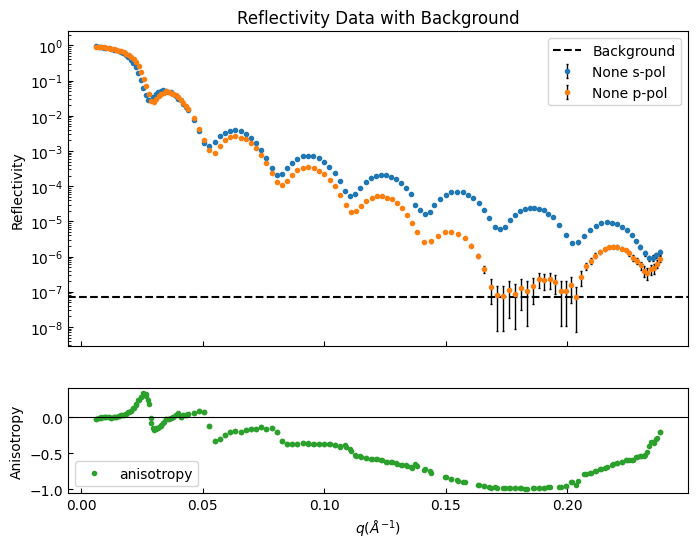

In [85]:
bkg = data.y.min()
ax_top, ax_bottom = data.plot()
ax_top.axhline(bkg, color="k", linestyle="--", label="Background")
ax_top.set_title("Reflectivity Data with Background")
ax_top.set_ylabel("Reflectivity")
ax_bottom.set_ylabel("Anisotropy")
ax_top.legend()

The chosen background seams to be doing a good job, so let's set it to a fixed value.


Number of parameters: 20
Varying parameters: 7
----------------------------------------------------------------------------------
|✓ | scale_s                        |      1.000 ±        0 | [0.8, 1.2]         |
|✓ | scale_p                        |      1.000 ±        0 | [0.8, 1.2]         |
|✗ | bkg                            |      0.000 ±        0 | [-inf, inf]        |
|✗ | dq - resolution                |      0.000 ±        0 | [-inf, inf]        |
|✗ | q_offset                       |      0.000 ±        0 | [-inf, inf]        |
|✗ | en_offset                      |      0.000 ±        0 | [-inf, inf]        |
|✓ | theta_offset_s                 |      0.000 ±        0 | [-0.8, 0.8]        |
|✓ | theta_offset_p                 |      0.000 ±        0 | [-0.8, 0.8]        |
|✗ | Vacuum_thick                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rough                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rho                     |   

(<Axes: ylabel='Reflectivity'>,
 <Axes: xlabel='$q (\\AA^{-1})$', ylabel='Anisotropy'>)

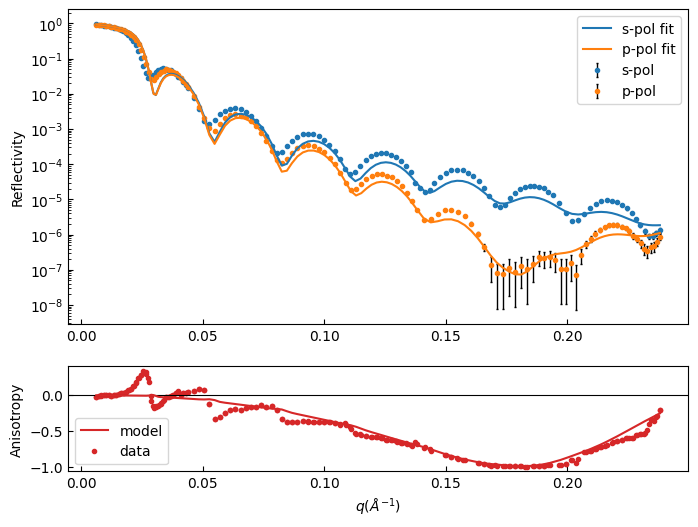

In [102]:
model.bkg.setp(value=bkg, vary=False)  # Set the background to a fixed value
# we will also set the scale and theta offset parameters to vary but arround a fixed value
model.scale_s.setp(vary=True, value=1.0, bounds=(0.8, 1.2))
model.scale_p.setp(vary=True, value=1.0, bounds=(0.8, 1.2))
# theta offset parameters should be small or they will cause issues with the fit
model.theta_offset_s.setp(vary=True, value=0.0, bounds=(-0.8, 0.8))
model.theta_offset_p.setp(vary=True, value=0.0, bounds=(-0.8, 0.8))
print_parameters(obj)
obj.plot()

## Super Simple Fitting

To start off this fit, we will just do a regular plain old Levenberg-Marquardt fitting.
This will likely do a bad job, but it allows us to see what it is doing.

<img src ="https://github.com/jiupinjia/Visualize-Optimization-Algorithms/blob/master/imgs/image010.gif?raw=true">


Number of parameters: 20
Varying parameters: 7
----------------------------------------------------------------------------------
|✓ | scale_s                        |      1.040 ±    0.008 | [0.8, 1.2]         |
|✓ | scale_p                        |      1.147 ±    0.008 | [0.8, 1.2]         |
|✗ | bkg                            |      0.000 ±        0 | [-inf, inf]        |
|✗ | dq - resolution                |      0.000 ±        0 | [-inf, inf]        |
|✗ | q_offset                       |      0.000 ±        0 | [-inf, inf]        |
|✗ | en_offset                      |      0.000 ±        0 | [-inf, inf]        |
|✓ | theta_offset_s                 |      0.290 ±     0.01 | [-0.8, 0.8]        |
|✓ | theta_offset_p                 |      0.030 ±     0.01 | [-0.8, 0.8]        |
|✗ | Vacuum_thick                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rough                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rho                     |   

(<Axes: ylabel='Reflectivity'>,
 <Axes: xlabel='$q (\\AA^{-1})$', ylabel='Anisotropy'>)

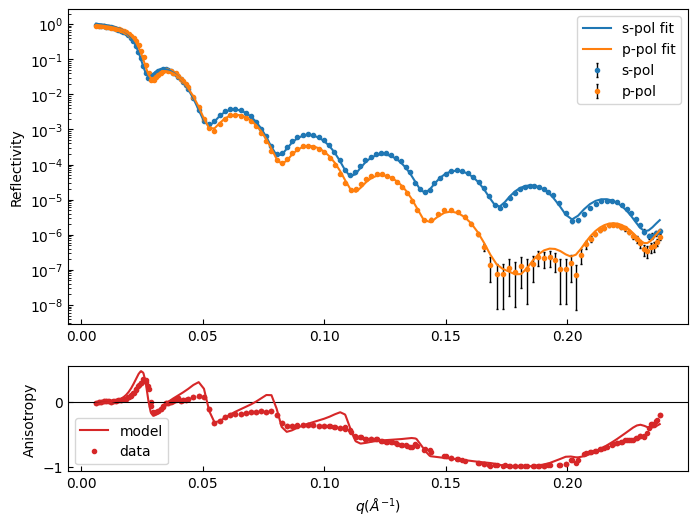

In [87]:
import copy

# create a copy of the objective to avoid modifying the original
current_obj = copy.deepcopy(obj)
# Create a fitter object and fit the model to the data
fitter = fit.CurveFitter(objective=current_obj)
fitter.fit("least_squares")
print_parameters(current_obj)
current_obj.plot()

This did a pretty good job for a single layer, and a single energy. **HINT: this model
and method won't work for the system we will want to look at**. So let's explore how
to change the fitting method.

### L-BFGS-B

<img src = "https://github.com/jiupinjia/Visualize-Optimization-Algorithms/raw/master/imgs/image012.gif">


-0.6147996210398781: : 52it [00:05,  9.89it/s] 

Number of parameters: 20
Varying parameters: 7
----------------------------------------------------------------------------------
|✓ | scale_s                        |      1.039 ±    0.008 | [0.8, 1.2]         |
|✓ | scale_p                        |      1.146 ±    0.008 | [0.8, 1.2]         |
|✗ | bkg                            |      0.000 ±        0 | [-inf, inf]        |
|✗ | dq - resolution                |      0.000 ±        0 | [-inf, inf]        |
|✗ | q_offset                       |      0.000 ±        0 | [-inf, inf]        |
|✗ | en_offset                      |      0.000 ±        0 | [-inf, inf]        |
|✓ | theta_offset_s                 |      0.290 ±     0.01 | [-0.8, 0.8]        |
|✓ | theta_offset_p                 |      0.020 ±     0.01 | [-0.8, 0.8]        |
|✗ | Vacuum_thick                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rough                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rho                     |   

(<Axes: ylabel='Reflectivity'>,
 <Axes: xlabel='$q (\\AA^{-1})$', ylabel='Anisotropy'>)

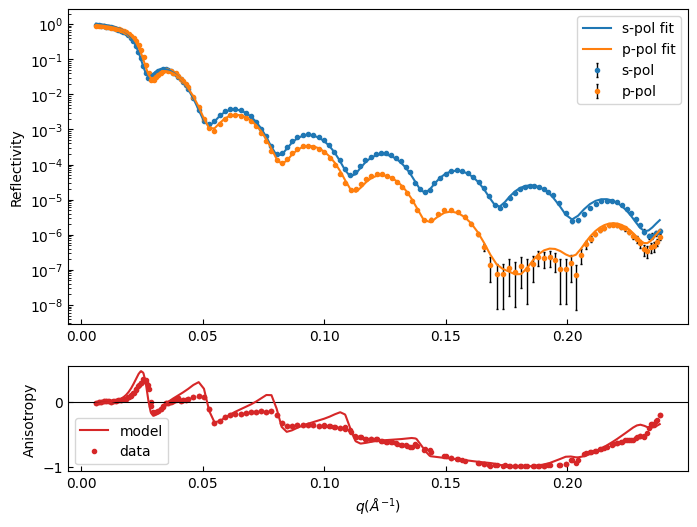

In [88]:
obj_lbfgs = copy.deepcopy(obj)
# Create a fitter object and fit the model to the data
fitter_lbfgs = fit.CurveFitter(objective=obj_lbfgs)
# This is a robust
fitter_lbfgs.fit("L-BFGS-B")
print_parameters(obj_lbfgs)
obj_lbfgs.plot()

### Differential Evolution

<img src = "https://github.com/jiupinjia/Visualize-Optimization-Algorithms/raw/master/imgs/image014.gif" style=" display: inline-block; margin-right: 5%; height: 800px;">
<img src = "https://user-images.githubusercontent.com/67086934/138877880-07734cfb-d726-4362-8c21-9e45ccf96e48.gif" style="display: inline-block; height: 800px;">


0it [00:00, ?it/s]/home/hduva/projects/xrr_notebooks/.venv/lib/python3.12/site-packages/scipy/optimize/_differentialevolution.py:487: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,
-0.6130031718662038: : 62it [00:09,  6.33it/s] 

Number of parameters: 20
Varying parameters: 7
----------------------------------------------------------------------------------
|✓ | scale_s                        |      1.039 ±    0.008 | [0.8, 1.2]         |
|✓ | scale_p                        |      1.146 ±    0.008 | [0.8, 1.2]         |
|✗ | bkg                            |      0.000 ±        0 | [-inf, inf]        |
|✗ | dq - resolution                |      0.000 ±        0 | [-inf, inf]        |
|✗ | q_offset                       |      0.000 ±        0 | [-inf, inf]        |
|✗ | en_offset                      |      0.000 ±        0 | [-inf, inf]        |
|✓ | theta_offset_s                 |      0.290 ±     0.01 | [-0.8, 0.8]        |
|✓ | theta_offset_p                 |      0.020 ±     0.01 | [-0.8, 0.8]        |
|✗ | Vacuum_thick                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rough                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rho                     |   

(<Axes: ylabel='Reflectivity'>,
 <Axes: xlabel='$q (\\AA^{-1})$', ylabel='Anisotropy'>)

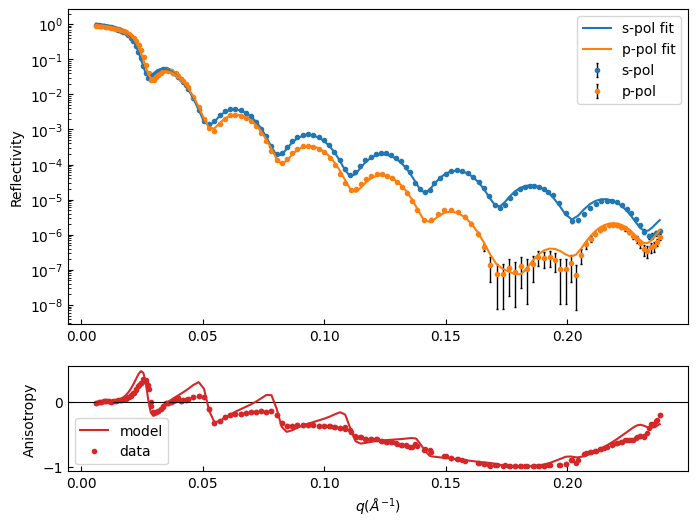

In [89]:
obj_de = copy.deepcopy(obj)
# Create a fitter object and fit the model to the data
fitter_de = fit.CurveFitter(objective=obj_de)
# This is a robust
fitter_de.fit("differential_evolution", workers=-1)  # this will use all available cores
print_parameters(obj_de)
obj_de.plot()
# you can ignore the warning that is thorown here. the .fit() method defaults some
# fitting parameters, but we care more about using the cores than the defaults.

# Monte Carlo Flying Circus

Markov Chain Monte Carlo is a powerful tool for fitting non linear systems like the one
we have here. We can do monte carlo in a couple of ways, but let's focus on using it for
fitting. To fit, we have two key parts

1. Finding the minima though genetic sampling
2. Sampling the parameter distribution within the minima


100%|██████████| 600/600 [00:33<00:00, 18.13it/s]


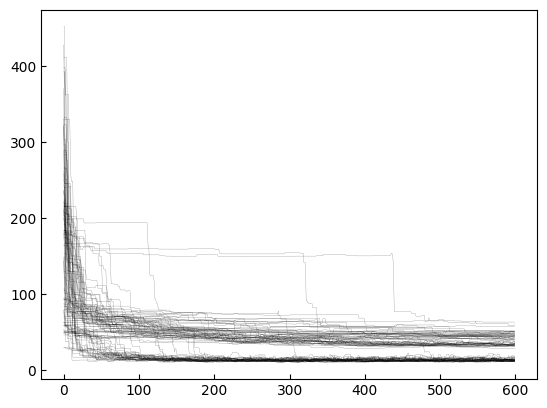

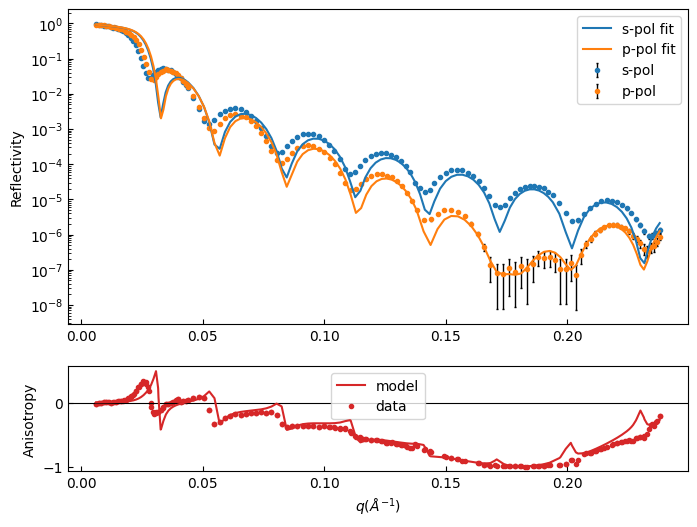

In [91]:
# Finding the minima
obj_mc = copy.deepcopy(obj)
# Create a fitter object and fit the model to the data
fitter_mc = fit.CurveFitter(objective=obj_mc, nwalkers=100)  # ~10 walkers per parameter
# We now need to initialize the chains/walkers for the Monte Carlo fit. We can use
# either flat prior sampling or a gaussian jitter over the current guesses.
fitter_mc.initialise("prior")
fitter_mc.sample(
    600
)  # This performs 100 draw, steps, itterations, and samples the posterior distribution
# and we want to see what the posterior distribution looks like for each parameter.
nlpost = -fitter_mc.logpost
plt.plot(nlpost, c="k", lw=0.2, alpha=0.5)
plt.show()
obj_mc.plot()
plt.show()

We can notice that a good number of the walkers get stuck just outside the minimal. Now
most make their way to the minima, but the others seam to be failing to get
there. This means that a good number of walkers are not in the minima at all. Let's see
where they ahve all ended up, this is done usually using corner plots.


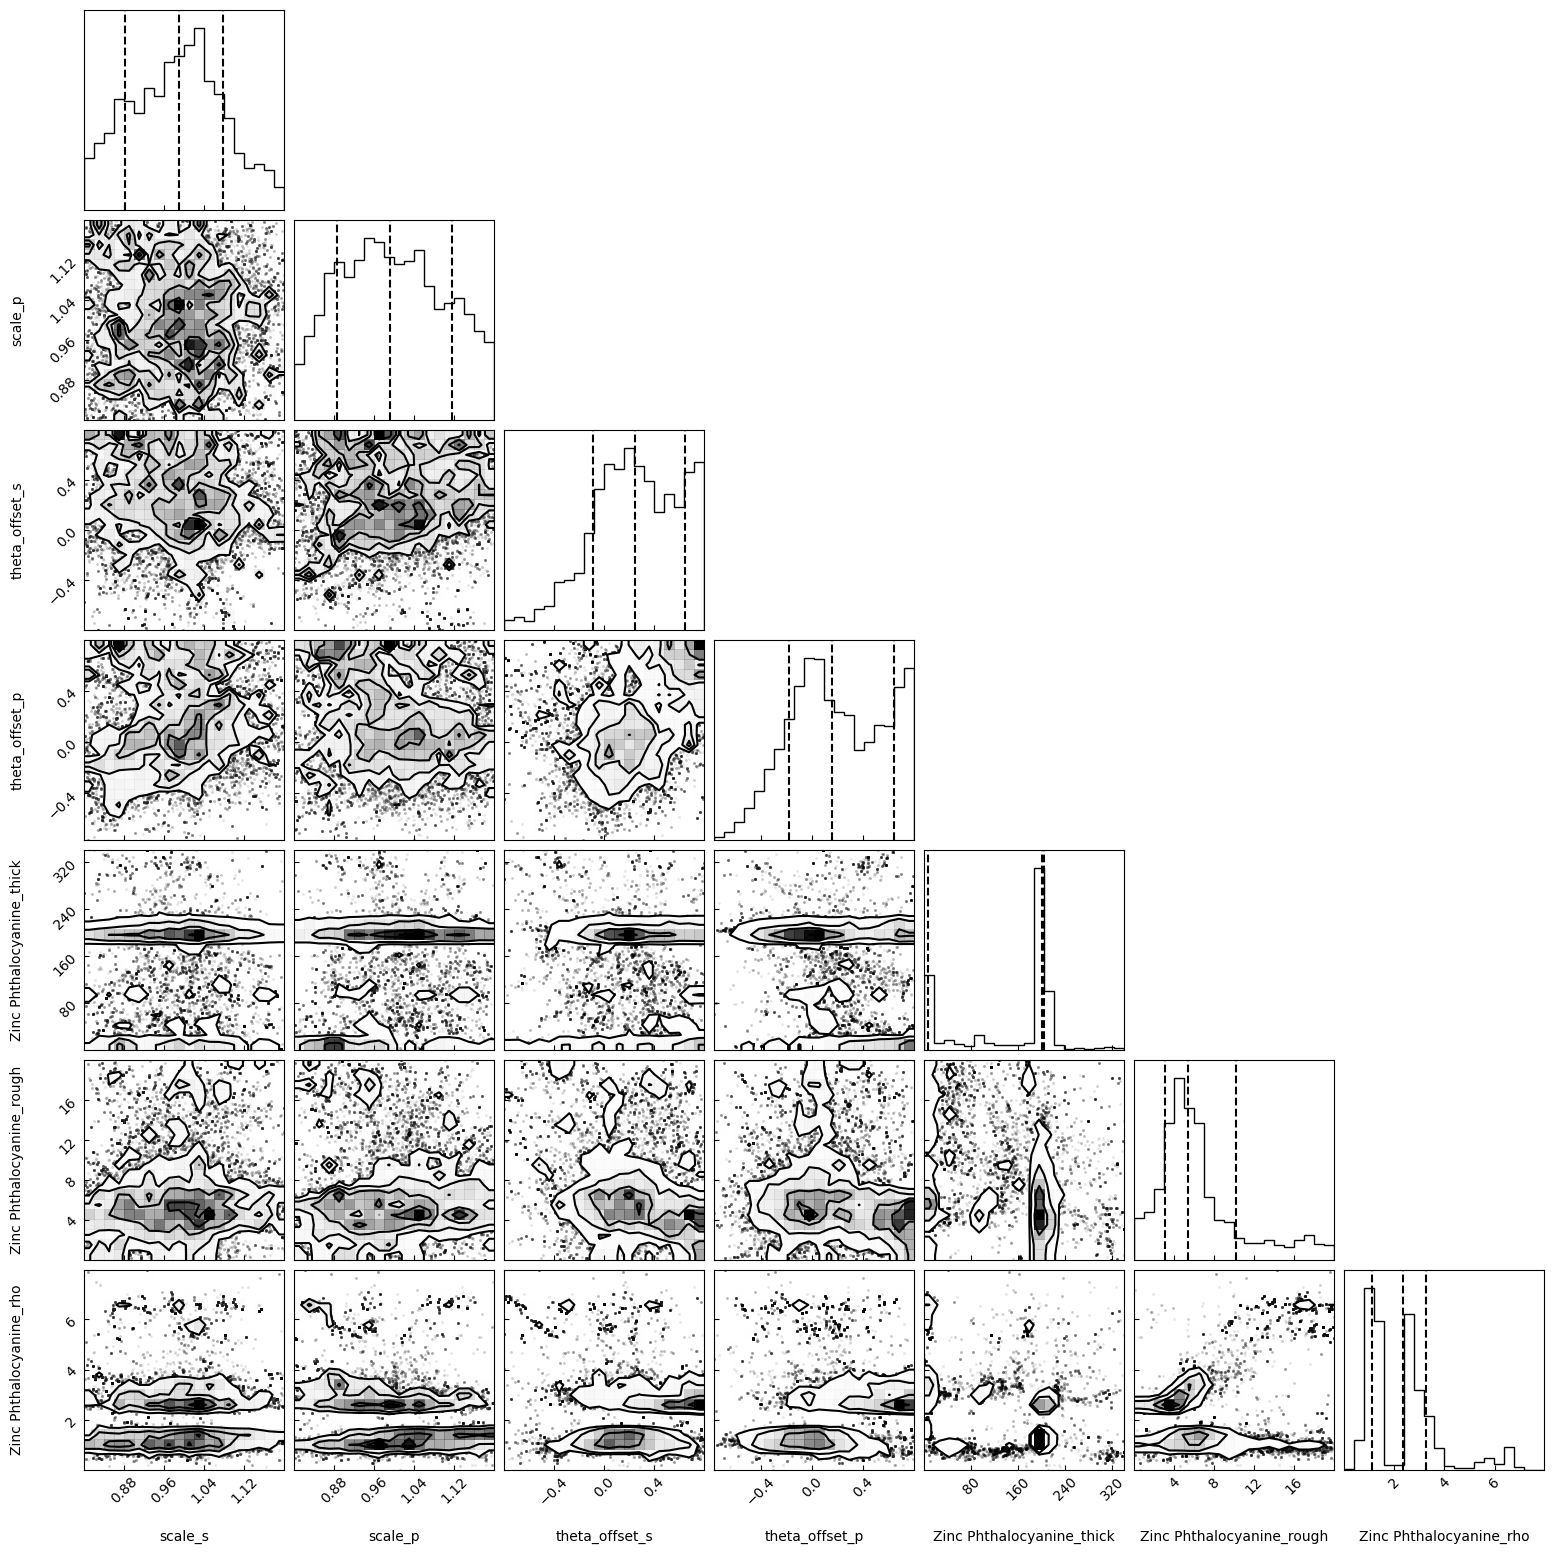

In [92]:
obj_mc.corner()
plt.show()

Notice how the density and thickness distributions are very bimodal. This is part of the
reason reflectivity fitting can be so challenging. We need to now improve the sampling
and to do that, we can just initialize the walkers in the minima they found, and see what
we can get.


100%|██████████| 1000/1000 [00:55<00:00, 17.98it/s]


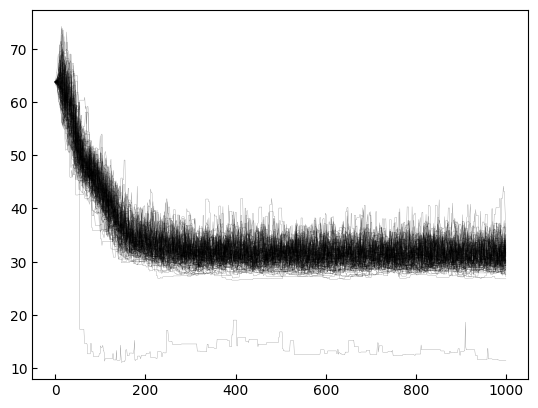

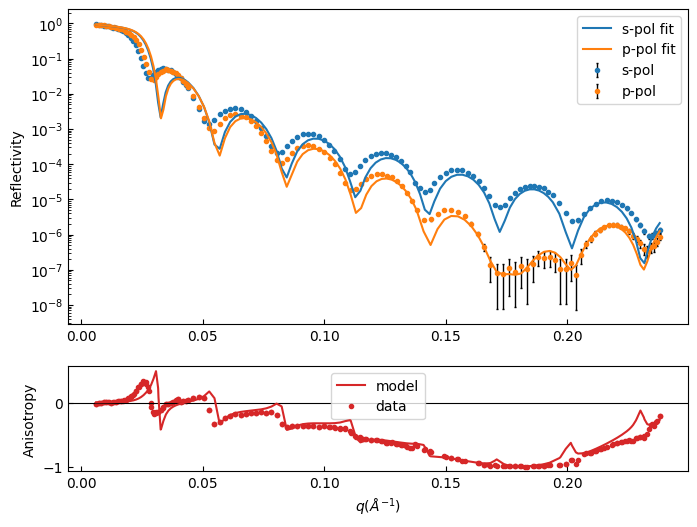

In [93]:
fitter_mc_2 = copy.deepcopy(fitter_mc)
fitter_mc_2.initialise("jitter")
fitter_mc_2.sample(
    1000,
)
nlpost = -fitter_mc_2.logpost
plt.plot(nlpost, c="k", lw=0.2, alpha=0.5)
plt.show()

obj_mc_2 = copy.deepcopy(obj_mc)
obj_mc_2.plot()
plt.show()

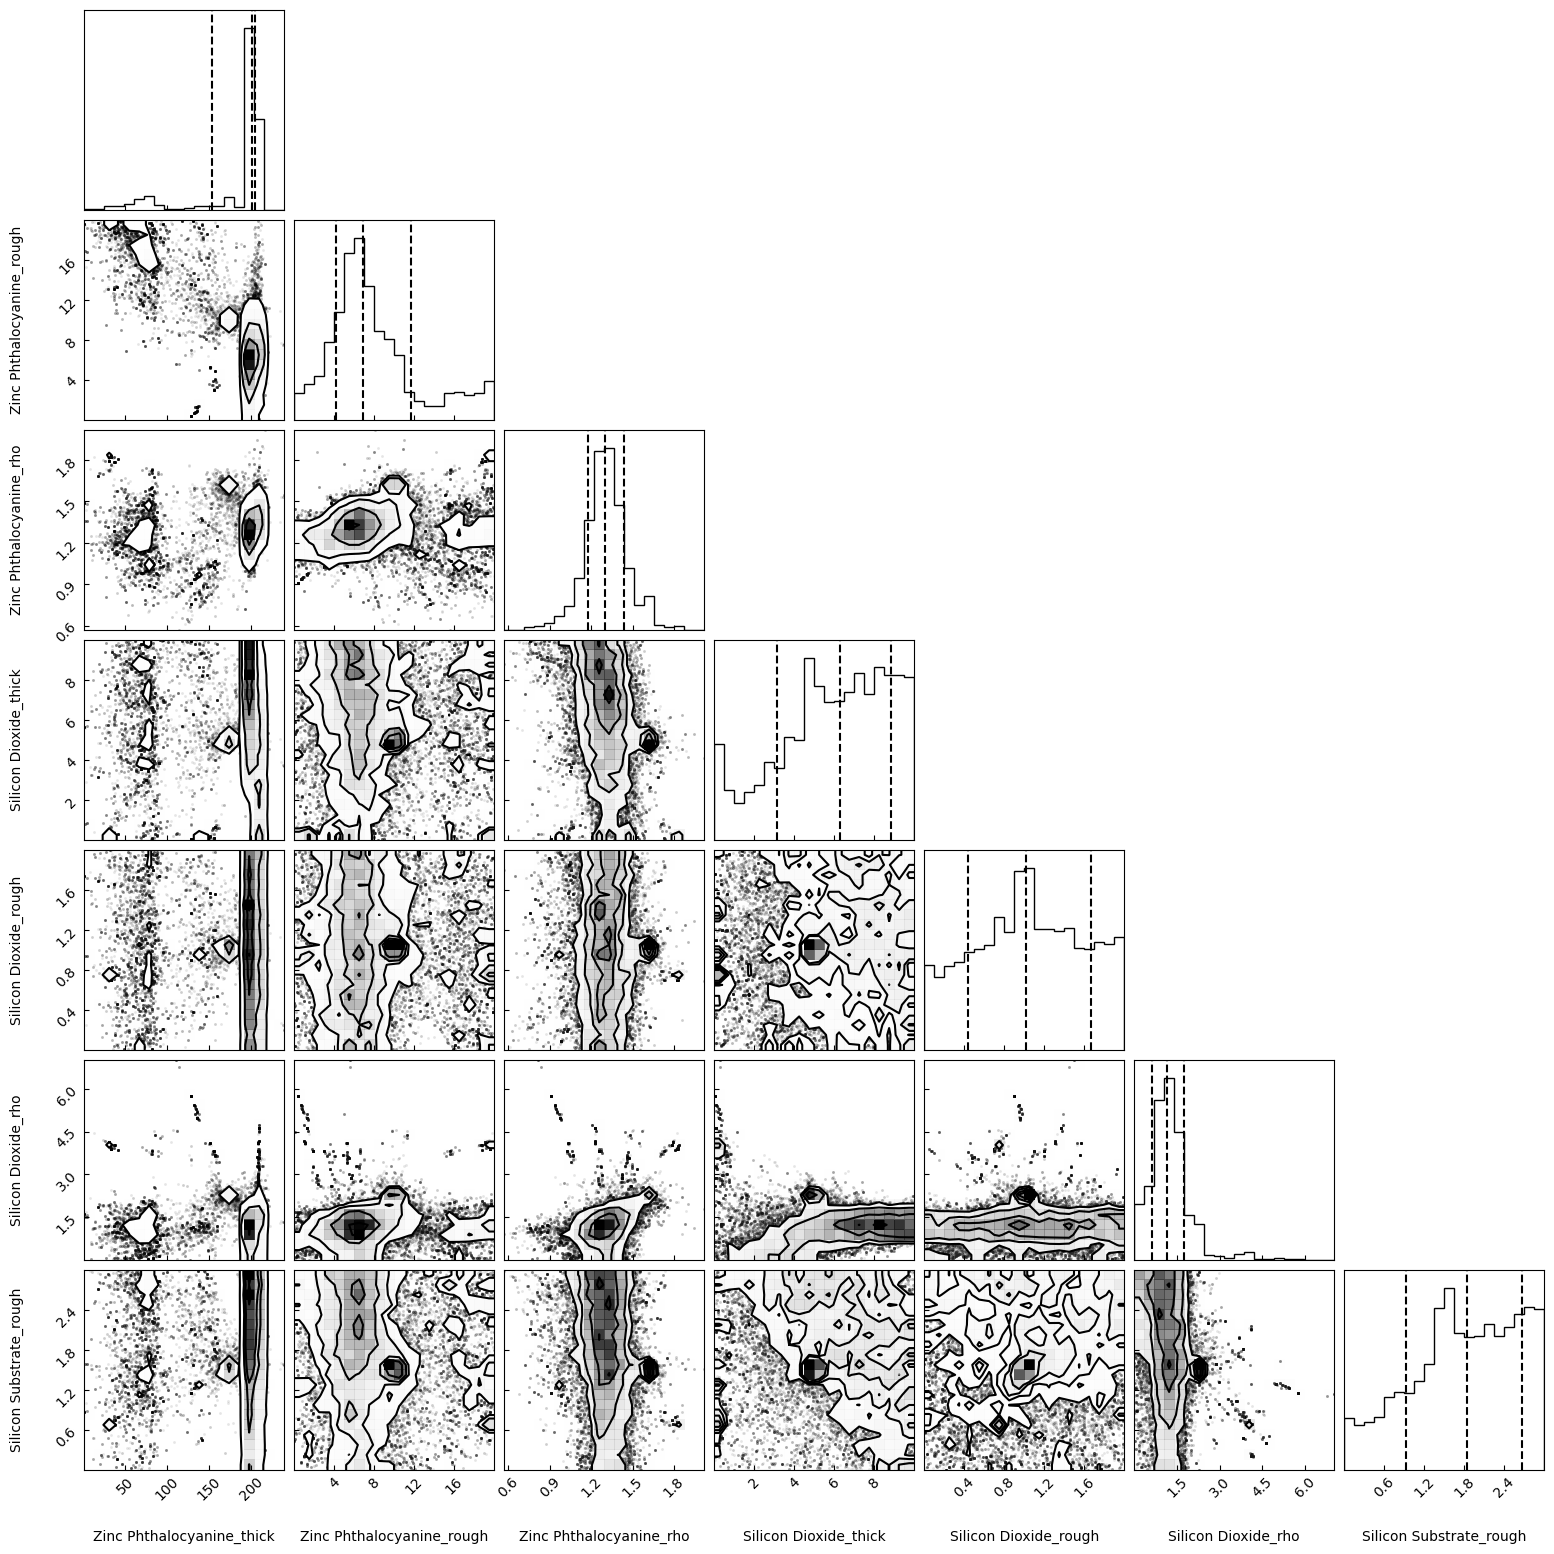

In [33]:
obj_mc_2.corner()
plt.show()

Now, you will notice, that the monte carlo fit is doing worse than the other optimizers.
This is because monte carlo is designed to sample a distributution and determine the likelyhood
of each parameter, not neciscarily to choose the best fit.

## Chaining Fit Methods

A great way to get arround this is
by starting the optimizer in a good spot as determined by a lighter weight, but still powerful
algorithm. For example the L-BFGS-B algorithm that we highlighted above. However, we also wan't
to ensure that the fitting algorithm correctly samples this space in a reasonable way. To do that,
we reset the parameter bounds to only sample between a reasonable range for each parameter.


In [94]:
obj_chained = copy.deepcopy(obj_lbfgs)

bulk.thick.setp(value=200.8, vary=True, bounds=(180, 220))

print_parameters(obj_chained)

Number of parameters: 20
Varying parameters: 7
----------------------------------------------------------------------------------
|✓ | scale_s                        |      1.039 ±    0.008 | [0.8, 1.2]         |
|✓ | scale_p                        |      1.146 ±    0.008 | [0.8, 1.2]         |
|✗ | bkg                            |      0.000 ±        0 | [-inf, inf]        |
|✗ | dq - resolution                |      0.000 ±        0 | [-inf, inf]        |
|✗ | q_offset                       |      0.000 ±        0 | [-inf, inf]        |
|✗ | en_offset                      |      0.000 ±        0 | [-inf, inf]        |
|✓ | theta_offset_s                 |      0.290 ±     0.01 | [-0.8, 0.8]        |
|✓ | theta_offset_p                 |      0.020 ±     0.01 | [-0.8, 0.8]        |
|✗ | Vacuum_thick                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rough                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rho                     |   

Now that we have fixed the parameter search range, let's do the monte carlo fit again.


100%|██████████| 1000/1000 [01:46<00:00,  9.38it/s]


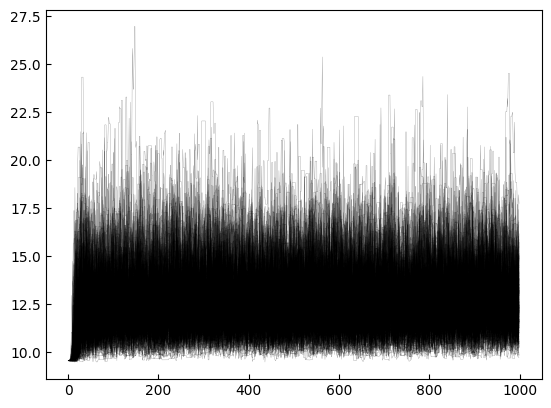

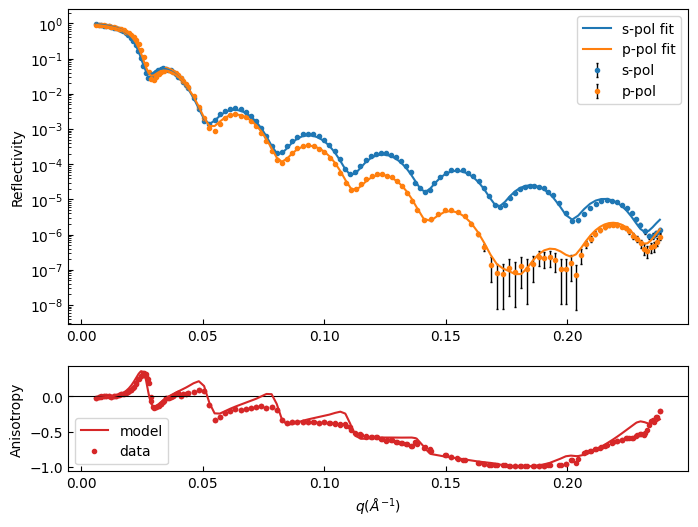

In [97]:
fitter_chained = fit.CurveFitter(objective=obj_chained, nwalkers=200)
fitter_chained.initialise("jitter")
fitter_chained.sample(
    1000, skip_check=True
)  # this will likely have a large initial condition number, so we skip the check and just sample
nlpost = -fitter_chained.logpost
plt.plot(nlpost, c="k", lw=0.2, alpha=0.5)
plt.show()

obj_chained.plot()
plt.show()

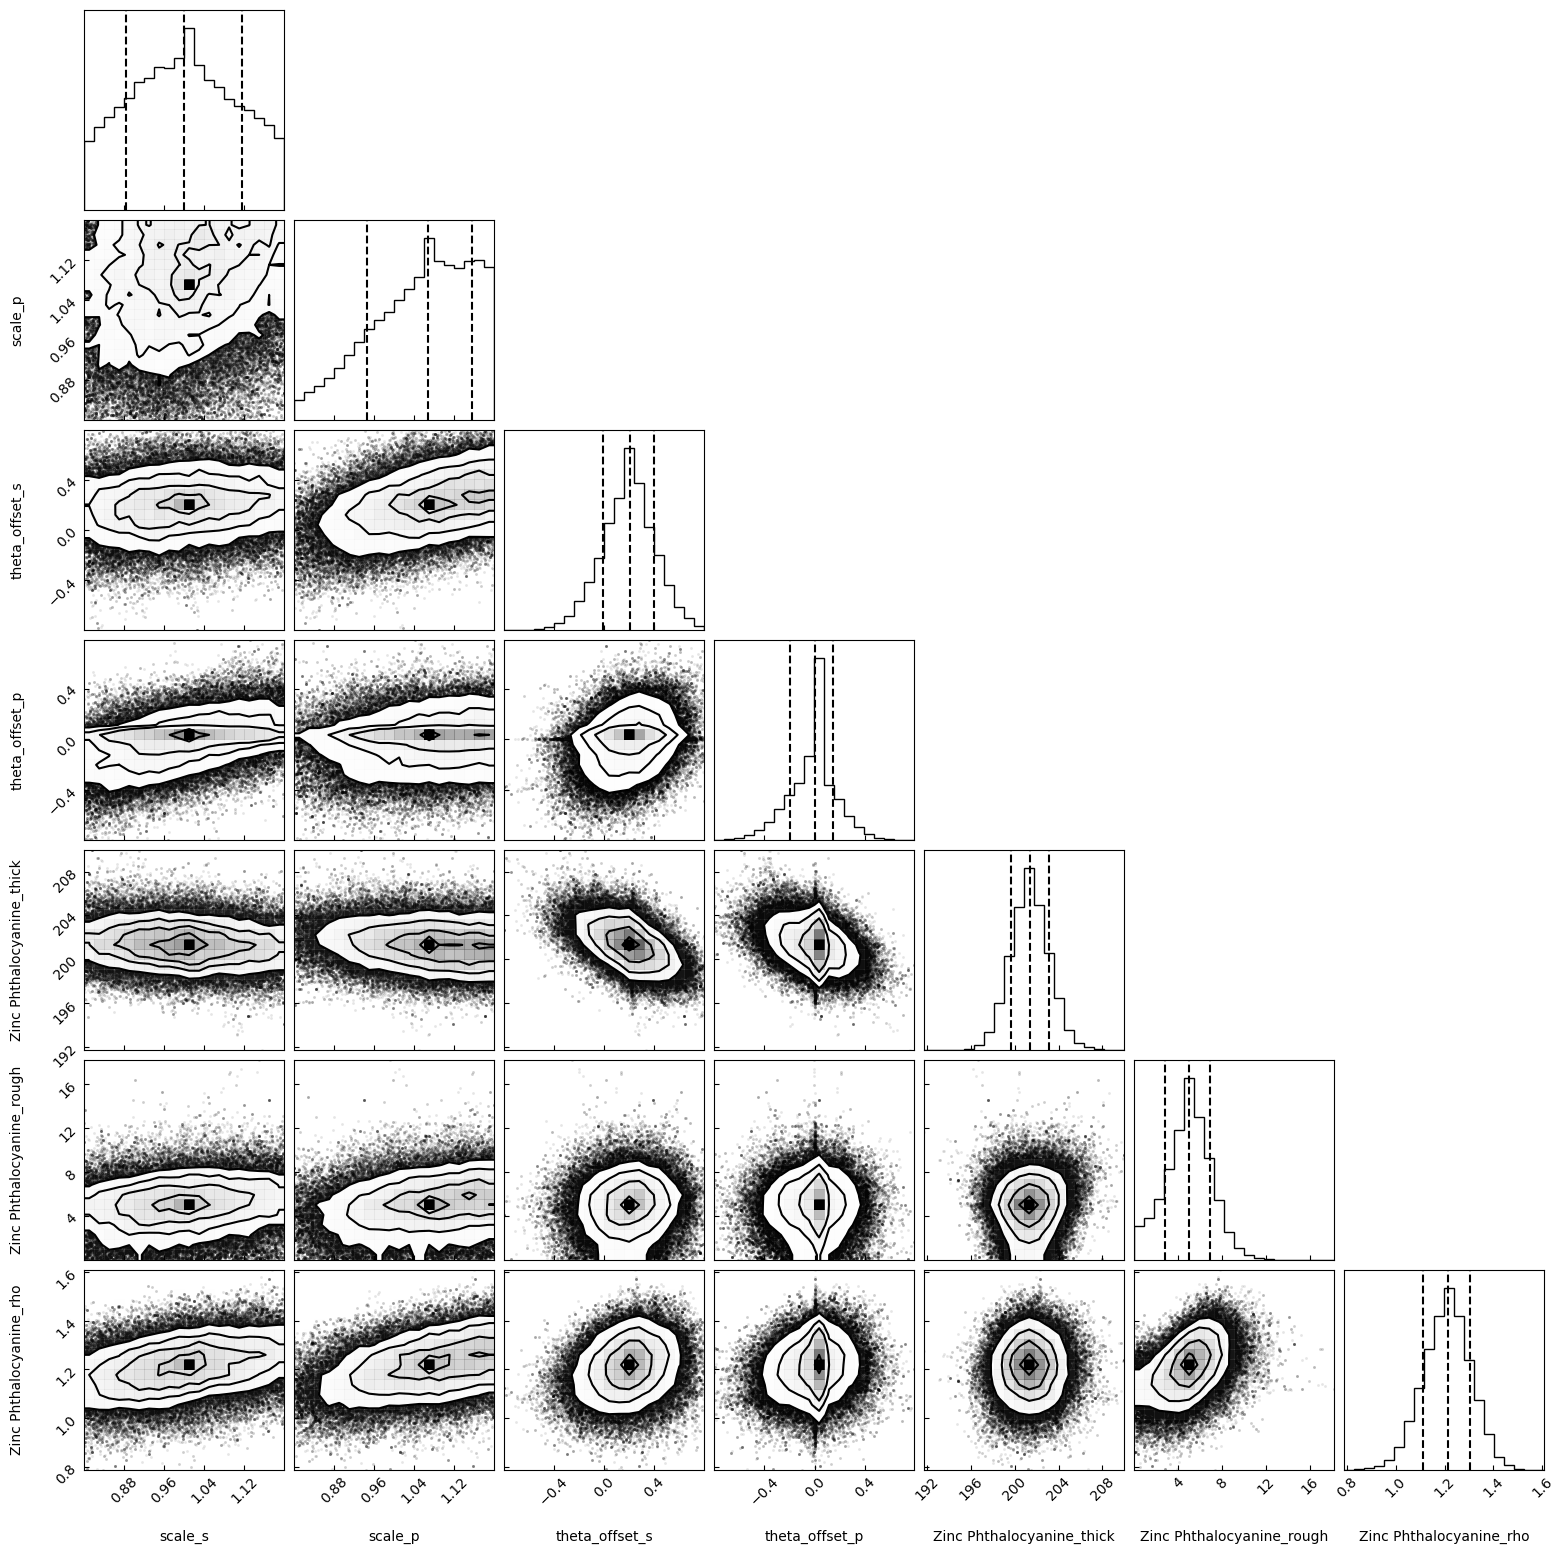

In [99]:
obj_chained.corner()
plt.show()

In [106]:
print_parameters(obj_chained)

Number of parameters: 20
Varying parameters: 7
----------------------------------------------------------------------------------
|✓ | scale_s                        |      1.000 ±      0.1 | [0.8, 1.2]         |
|✓ | scale_p                        |      1.100 ±      0.1 | [0.8, 1.2]         |
|✗ | bkg                            |   7.14e-08 ±        0 | [-inf, inf]        |
|✗ | dq - resolution                |      0.000 ±        0 | [-inf, inf]        |
|✗ | q_offset                       |      0.000 ±        0 | [-inf, inf]        |
|✗ | en_offset                      |      0.000 ±        0 | [-inf, inf]        |
|✓ | theta_offset_s                 |      0.200 ±      0.2 | [-0.8, 0.8]        |
|✓ | theta_offset_p                 |      0.000 ±      0.2 | [-0.8, 0.8]        |
|✗ | Vacuum_thick                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rough                   |      0.000 ±        0 | [0.0, 0.0]         |
|✗ | Vacuum_rho                     |   